In [1]:
import pandas as pd
import numpy as np    # for mathematical operations
from skimage.transform import resize   # for resizing imagesfrom keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.preprocessing import image as image_utils

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

import tensorflow as tf  
from keras.backend.tensorflow_backend import set_session  
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU  
config.log_device_placement = True  # to log device placement (on which device the operation ran)  
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)  
set_session(sess)  # set this TensorFlow session as the default session for Keras  

Using TensorFlow backend.


In [2]:
labels = pd.read_csv('jester-v1-labels.csv',sep=';',header=None,names=['Class'])     # reading the csv file
# integer encode
label_encoder = LabelEncoder()
labels['Label'] = label_encoder.fit_transform(labels['Class'])
labels

FileNotFoundError: File b'jester-v1-labels.csv' does not exist

In [ ]:
train = pd.read_csv('jester-v1-train.csv',sep=';',header=None,names=['Video','Class'])     # reading the csv file
train['Label'] = label_encoder.fit_transform(train['Class'])
train.head()      # printing first five rows of the file

In [ ]:
validation = pd.read_csv('jester-v1-validation.csv',sep=';',header=None,names=['Video','Class'])     # reading the csv file
validation['Label'] = label_encoder.fit_transform(validation['Class'])
validation.head()      # printing first five rows of the file

In [ ]:
test = pd.read_csv('jester-v1-test.csv',sep=';',header=None,names=['Video'])     # reading the csv file
test.head()      # printing first five rows of the file

In [ ]:
def load_video(video):
    file
    
    
    
load_video(train['Video'][1])

In [ ]:
#load images into a array
from keras.preprocessing.image import load_img, array_to_img, img_to_array
img = load_img('generated_images512_timesampled/pos/1/0.png')
print(type(img))
x = img_to_array(img)
print(type(x))
print(x.shape)
x = x.reshape((1,) + x.shape)
print(type(x))
print(x.shape)
img = load_img('generated_images512_timesampled/pos/1/1.png')


<class 'numpy.ndarray'>
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]
(63, 173)


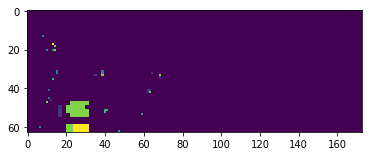

In [10]:
#load images into a array
img = cv2.imread('generated_images512_timesampled/pos/1/0.png',0)
print(type(img))
X = []
X.append(img)
img = cv2.imread('generated_images512_timesampled/pos/1/1.png',0)
X.append(img)
print(X)
plt.imshow(X.pop())
plt.imshow(X.pop())
print(img.shape)

In [ ]:
#iterate over data cases
for index, row in df.iterrows():
    print(row['c1'], row['c2'])

In [29]:
import struct
file = open("E:/Jupyter/Project/DvsGesture/user01_fluorescent.aedat",'rb')
print (file.read(105))
events = []
header=file.read(28)
while len(header)>0:
    (eventsource,eventsize,eventoffset,overflow,capacity,number,valid)=struct.unpack("iiiiiii",header)
    for n in range(number):
        (data,time)=struct.unpack("ii",file.read(8))
        x=(data>>17)&0x00001FFF
        y=(data>>2)&0x00001FFF
        p=(data>>1)&0x00000001
        events.append([x,y,time,p])
    header=file.read(28)
print (events[0:100])

b'#!AER-DAT3.1\r\n#Format: RAW\r\n#Source 1: DVS128\r\n#Start-Time: 2016-06-14 15:26:24 (TZ-0700)\r\n#!END-HEADER\r\n'
[[56, 78, 80046394, 1], [63, 78, 80046412, 1], [46, 90, 80046414, 1], [69, 87, 80046427, 1], [69, 89, 80046433, 1], [62, 71, 80046452, 1], [59, 88, 80046452, 1], [59, 122, 80046453, 1], [49, 89, 80046467, 1], [60, 77, 80046527, 1], [77, 92, 80046548, 1], [9, 67, 80046548, 1], [35, 81, 80046575, 1], [61, 83, 80046592, 1], [0, 9, 80046594, 0], [61, 91, 80046598, 1], [52, 91, 80046617, 1], [93, 93, 80046619, 1], [85, 100, 80046657, 1], [91, 96, 80046789, 1], [76, 92, 80046875, 1], [52, 87, 80046923, 1], [74, 93, 80046973, 1], [57, 88, 80046992, 0], [62, 79, 80046995, 1], [78, 92, 80046998, 0], [55, 92, 80047019, 0], [46, 100, 80047026, 0], [92, 101, 80047075, 1], [59, 88, 80047091, 0], [59, 88, 80047092, 0], [52, 96, 80047120, 0], [71, 107, 80047125, 1], [73, 84, 80047129, 1], [77, 95, 80047150, 0], [56, 88, 80047200, 0], [77, 92, 80047229, 0], [56, 77, 80047259, 1], [66,

In [12]:
import pandas as pd
asdf = pd.read_csv("E:/Jupyter/Project/DvsGesture/"user01_fluorescent"_labels.csv")     # reading the csv file
#asdf.head()      # printing first five rows of the file
for __, row in asdf.iterrows():
    print(row['class'],row['startTime_usec'],row['endTime_usec'])

1 80048239 85092709
2 89431170 95231007
3 95938861 103200075
4 114845417 123499505
5 124344363 131742581
6 133660637 141880879
7 142360393 149138239
8 150717639 157362334
8 157773346 164029864
9 165057394 171518239
10 172843790 179442817
11 180675853 187389051


In [1]:
import pandas as pd
import struct
vid_num=1
train_dict={}
with open("E:/Jupyter/Project/DvsGesture/trials_to_test.txt") as file:
    for line in file:
        setting = line.replace('.aedat\n',"")
        #print(setting)
        asdf = pd.read_csv("E:/Jupyter/Project/DvsGesture/"+setting+"_labels.csv")     # reading the csv file
        #asdf.head()      # printing first five rows of the file
        
        file = open("E:/Jupyter/Project/DvsGesture/"+setting+".aedat",'rb')
        file.read(105)
        all_events = []
        header=file.read(28)
        while len(header)>0:
            (eventsource,eventsize,eventoffset,overflow,capacity,number,valid)=struct.unpack("iiiiiii",header)
            for n in range(number):
                (data,t)=struct.unpack("ii",file.read(8))
                x=(data>>17)&0x00001FFF
                y=(data>>2)&0x00001FFF
                p=(data>>1)&0x00000001
                all_events.append([x,y,t,p])
            header=file.read(28)
            
            
        for __, row in asdf.iterrows():
            #print(row['class'],row['startTime_usec'],row['endTime_usec'])
            
            
            events=[]
            for event in all_events:
                if event[2]<row['endTime_usec'] and event[2]>row['startTime_usec']:
                    events.append(event)
            
            folder = "D:/Project/eventbins/dvs_generated"
            if not os.path.exists(folder + "/pos/" + str(vid_num)):
                os.makedirs(folder + "/pos/" + str(vid_num))
            if not os.path.exists(folder + "/neg/" + str(vid_num)):
                os.makedirs(folder + "/neg/" + str(vid_num))
            frame_num = 0
            generate_interval =  len(events)//64 +1
            if generate_interval < 256:
                generate_interval = 256
            for start_entry in np.arange(generate_interval, len(events), generate_interval):
                frame_start = events[start_entry][2] #time of start entry
                pos = Image.new("L", (128, 128),color=0)      # "1 for single bit"
                neg = Image.new("L", (128, 128),color=0)      # "1 for single bit"
                curr_entry = start_entry
                while curr_entry>0 and events[curr_entry+1][2]>frame_start-time_interval*255:
                    curr_entry -=1
                while curr_entry<start_entry:
                    if events[curr_entry][3] == 1:
                        pos.putpixel((events[curr_entry][0],events[curr_entry][1]),255-(frame_start-events[curr_entry][2])//time_interval)
                    else:
                        neg.putpixel((events[curr_entry][0],events[curr_entry][1]),255-(frame_start-events[curr_entry][2])//time_interval)
                    curr_entry += 1
                pos = pos.transpose(Image.FLIP_TOP_BOTTOM)
                pos.save(folder + "/pos/" + str(vid_num) + "/" + str(int(frame_num)) + ".png", "PNG")
                neg = neg.transpose(Image.FLIP_TOP_BOTTOM)
                neg.save(folder + "/neg/" + str(vid_num) + "/" + str(int(frame_num)) + ".png", "PNG")
                frame_num += 1
            
            train_dict[vid_num]=row['class']
            vid_num+=1
            
    train = pd.DataFrame.from_dict(train_dict,orient='index')
    train.to_csv('E:\Jupyter\Project\dvs128validation.csv',sep=';',header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Jupyter/Project/DvsGesture/trials_to_test.txt'

In [ ]:
import pandas as pd
import struct
import os
from PIL import Image
import numpy as np
import time
train_dict={}
time_interval = 256
with open("D:/Project/eventbins/DvsGesture/trials_to_train.txt") as file:
    for line in file:
        setting = line.replace('.aedat\n',"")
        #print(setting)
        asdf = pd.read_csv("D:/Project/eventbins/DvsGesture/"+setting+"_labels.csv")     # reading the csv file
        #asdf.head()      # printing first five rows of the file
        
        file = open("D:/Project/eventbins/DvsGesture/"+setting+".aedat",'rb')
        file.read(105)
        all_events = []
        header=file.read(28)
        strtime=time.time()
        while len(header)>0:
            (eventsource,eventsize,eventoffset,overflow,capacity,number,valid)=struct.unpack("iiiiiii",header)
            for n in range(number):
                (data,t)=struct.unpack("ii",file.read(8))
                x=(data>>17)&0x00001FFF
                y=(data>>2)&0x00001FFF
                p=(data>>1)&0x00000001
                all_events.append([x,y,t,p])
            header=file.read(28)
        print(time.time()-strtime,"read event stream")
            
        for __, row in asdf.iterrows():
            #print(row['class'],row['startTime_usec'],row['endTime_usec'])
            
            
            strtime=time.time()
            events=[]
            for event in all_events:
                if event[2]<row['endTime_usec'] and event[2]>row['startTime_usec']:
                    events.append(event)
            
            folder = "D:/Project/eventbins/dvs_generated"
            if not os.path.exists(folder + "/pos/" + str(vid_num)):
                os.makedirs(folder + "/pos/" + str(vid_num))
            if not os.path.exists(folder + "/neg/" + str(vid_num)):
                os.makedirs(folder + "/neg/" + str(vid_num))
            frame_num = 0
            generate_interval =  len(events)//64 +1
            if generate_interval < 256:
                generate_interval = 256
            for start_entry in np.arange(generate_interval, len(events), generate_interval):
                frame_start = events[start_entry][2] #time of start entry
                pos = Image.new("L", (128, 128),color=0)      # "1 for single bit"
                neg = Image.new("L", (128, 128),color=0)      # "1 for single bit"
                curr_entry = start_entry
                while curr_entry>0 and events[curr_entry+1][2]>frame_start-time_interval*255:
                    curr_entry -=1
                while curr_entry<start_entry:
                    if events[curr_entry][3] == 1:
                        pos.putpixel((events[curr_entry][0],events[curr_entry][1]),255-(frame_start-events[curr_entry][2])//time_interval)
                    else:
                        neg.putpixel((events[curr_entry][0],events[curr_entry][1]),255-(frame_start-events[curr_entry][2])//time_interval)
                    curr_entry += 1
                pos = pos.transpose(Image.FLIP_TOP_BOTTOM)
                pos.save(folder + "/pos/" + str(vid_num) + "/" + str(int(frame_num)) + ".png", "PNG")
                neg = neg.transpose(Image.FLIP_TOP_BOTTOM)
                neg.save(folder + "/neg/" + str(vid_num) + "/" + str(int(frame_num)) + ".png", "PNG")
                frame_num += 1
            
            print(time.time()-strtime,"end")
            
            train_dict[vid_num]=row['class']
            vid_num+=1
            
    train = pd.DataFrame.from_dict(train_dict,orient='index')
    train.to_csv('E:\Jupyter\Project\dvs128train.csv',sep=';',header=None)

8.17994236946106 read event stream
54.153526306152344 end


In [41]:
import pandas as pd
import struct
vid_num=1
train_dict={}
with open("E:/Jupyter/Project/DvsGesture/trials_to_test.txt") as file:
    for line in file:
        setting = line.replace('.aedat\n',"")
        #print(setting)
        asdf = pd.read_csv("E:/Jupyter/Project/DvsGesture/"+setting+"_labels.csv")     # reading the csv file
        #asdf.head()      # printing first five rows of the fil
            
            
        for __, row in asdf.iterrows():
            #print(row['class'],row['startTime_usec'],row['endTime_usec'])
            train_dict[vid_num]=row['class']
            vid_num+=1
            
    print(train_dict)
    train = pd.DataFrame.from_dict(train_dict,orient='index')
    train.head()
    train.to_csv('E:\Jupyter\Project\dvs128test.csv',sep=';',header=None)

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 8, 10: 9, 11: 10, 12: 11, 13: 1, 14: 2, 15: 3, 16: 4, 17: 5, 18: 6, 19: 7, 20: 8, 21: 8, 22: 9, 23: 10, 24: 11, 25: 1, 26: 2, 27: 3, 28: 4, 29: 5, 30: 6, 31: 7, 32: 8, 33: 8, 34: 9, 35: 10, 36: 11, 37: 1, 38: 2, 39: 3, 40: 4, 41: 5, 42: 6, 43: 7, 44: 8, 45: 8, 46: 9, 47: 10, 48: 11, 49: 1, 50: 2, 51: 3, 52: 4, 53: 5, 54: 6, 55: 7, 56: 8, 57: 8, 58: 9, 59: 10, 60: 11, 61: 1, 62: 2, 63: 3, 64: 4, 65: 5, 66: 6, 67: 7, 68: 8, 69: 8, 70: 9, 71: 10, 72: 11, 73: 1, 74: 2, 75: 3, 76: 5, 77: 4, 78: 6, 79: 7, 80: 8, 81: 8, 82: 9, 83: 10, 84: 11, 85: 1, 86: 2, 87: 3, 88: 4, 89: 5, 90: 6, 91: 7, 92: 8, 93: 8, 94: 9, 95: 10, 96: 11, 97: 1, 98: 2, 99: 3, 100: 4, 101: 5, 102: 6, 103: 7, 104: 8, 105: 8, 106: 9, 107: 10, 108: 11, 109: 1, 110: 2, 111: 3, 112: 4, 113: 5, 114: 6, 115: 7, 116: 8, 117: 8, 118: 9, 119: 10, 120: 11, 121: 1, 122: 2, 123: 3, 124: 4, 125: 5, 126: 6, 127: 7, 128: 8, 129: 8, 130: 9, 131: 10, 132: 11, 133: 1, 134: 2, 135: 3, 136: 

In [ ]:
import pandas as pd
import struct
vid_num=1
train_dict={}
with open("E:/Jupyter/Project/DvsGesture/trials_to_test.txt") as file:
    for line in file:
        setting = line.replace('.aedat\n',"")
        #print(setting)
        asdf = pd.read_csv("E:/Jupyter/Project/DvsGesture/"+setting+"_labels.csv")     # reading the csv file
        #asdf.head()      # printing first five rows of the fil
            
            
        for __, row in asdf.iterrows():
            #print(row['class'],row['startTime_usec'],row['endTime_usec'])
            train_dict[vid_num]=row['class']
            vid_num+=1
            
    print(train_dict)
    train = pd.DataFrame.from_dict(train_dict,orient='index')
    train.head()
    train.to_csv('E:\Jupyter\Project\dvs128test.csv',sep=';',header=None)

In [40]:
with open("E:/Jupyter/Project/DvsGesture/trials_to_test.txt") as file:
    for line in file:
        setting = line.replace('.aedat\n',"")
        print(setting,)

user24_fluorescent

user24_fluorescent_led

user24_led

user25_fluorescent

user25_led

user26_fluorescent

user26_fluorescent_led

user26_lab

user26_led

user26_natural

user27_fluorescent

user27_fluorescent_led

user27_led

user27_natural

user28_fluorescent

user28_fluorescent_led

user28_lab

user28_led

user28_natural

user29_fluorescent

user29_fluorescent_led

user29_lab

user29_led

user29_natural
